# DSC180b Capstone Project

## Importing Packages

In [1]:
import json
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import torch as t

# import biom
# from qiime2.plugins import feature_table
# from qiime2 import Artifact
# from qiime2.plugins.metadata.methods import distance_matrix


## Loading Data

In [3]:
## Obtaining file paths
with open("config/data-params.json") as fh:
    file_paths = json.load(fh)

In [4]:
raw_feature_table = pd.read_csv('data/raw/feature_table.csv').set_index('Unnamed: 0')
raw_feature_table.head()

,AACATAAGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGCCCGGAATCACTGGGCGTAAAGGGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAAACACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCATAAAGGGCGCGTAGGTGGTTTGTTAAGTCAGATGTGAAATGTAGGGGCTCAACCCCTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGAGCGCGTAGGTGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGCAGGCGGTCTGTTAAGTCAGATGTGAAAGGTTAGGGCTCAACCCTGAACGTGCATCTGATACTGGCAGACTTGAGTATGGAAGAGGTAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCAGTTTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGCCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCAGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCTGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,AACATAGGGGGCAAGCGTTGTCCGGAATCACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGTCGGATGTGAAATGTAAGGGCTCAACCCTTAACGTGCATCCGATACTGGCAGACTTGAGTGCGGAAGAGGCAAGTGGAATTCCTAG,...,TTCGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGATCGTAGACGGCGAGACAAGTCTGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTGGAAACTGCCTTGCTAGAGTGCTGGAGAGGTAAGTGGAATTCCTAG,TTCGTAGGGGGCAAGCGTTGTCCGGAATGACTGGGCGTAAAGGGCGTGTAGGCGGCCTGATAAGTATGAAGTGAAAGTCCTGCTTTCAAGGTGGGAATTGCTTTGTAGACTGTCGGGCTTGAGTGCGGAAGAGGTAAGTGGAATTCCCAG,TTCGTAGGGGGCAAGCGTTGTCCGGAATGATTGGGCGTAAAGGGCGCGTAGGCGGCCTGCTAAGTCTGGAGTGAAAGTCCTGCTTTCAAGGTGGGAATTGCTTTGGATACTGGTGGGCTGGAGTGCAGGAGAGGAAAGCGGAATTACCGG,TTCGTAGGGGGCGAGCGTTATCCGGATTTATTGGGCGTAAAGCGTGCGTAGGCGGTTTATTAAGTCTAGAATTAAAGCCCGAGGCTTAACCTCGGTTCGTTCTAGATACTGGTTGACTAGAGTACAGTAGAGGCAAATGGAATTCCTAGT,TTCGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGAGCAGCAAGTCAGAAGTGAAATCTCTGGGCTCAACCCAGAAACTGCTTTTGAAACTGTTGCCCTTGAGTATCGGAGAGGCAGGCGGAATTCCTAG,TTCGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGGCGGGACGGCAAGTCAGGCGTGAAAACCATGGGCTCAACCCATGGCCTGCGTTTGAAACTGTTGTTCTTGAGTACTGGAGAGGTTGGCGGAATTCCTAG,TTCGTAGGTGGCGAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGGAATGCAAGTCAGATGTGAAATCCAGGGGCTTAACTCTTGAACTGCATTTGAAACTGTATTTCTTGAGTGTCGGAGAGGTTGACGGAATTCCTAG,TTCGTAGGTGGCGAGCGTTGTCCGGAATGACTGGGCGTAAAGGGAGCGTAGGCGGCACAACAAGTTAGGAGTGAAATACCGTGGCTTAACCACGGAACTGCTTTTAAAACTGTTGAGCTAGAGTGATGGAGAGGAAAGCGGAATTCCTAG,TTCGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGTGCGTAGGTGGCAGTGCAAGTCAGATGTGAAAGGCCGGGGCTCAACCCCGGAGCTGCATTTGAAACTGCATAGCTAGAGTACAGGAGAGGCAGGCGGAATTCCTAG,TTCGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGCTGTGTAAGTCTGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTGGAAACTATGCAGCTAGAGTGTCGGAGAGGTAAGTGGAATTCCCAG
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
11666.BLANK7.7B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.BLANK5.5B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.G0341A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.BLANK3.3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11666.BLANK5.5E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
raw_metadata = pd.read_csv('data/raw/11666_metadata.txt', sep='\t', index_col=0)
raw_metadata.head()

/tmp/ipykernel_664/1082994228.py:1: DtypeWarning: Columns (1,2,3,4,6,7,8,10,11,12,13,14,17,18,19,20,25,26,27,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,55,56,57,61,62,63,64,65,66,67,69,70,71,72,73,75,76,78,80,82,83,84,85,86,87,88,89,90,91,92,95,98,99,102,103,104,105,106,107,108,109,111,119,121,122,123,124,125,126,127,128,129,130,131,132,133,134,136,138,139,141,142,143,144,145,146,147,148,152,153,155,156,157,160,164,165,168,169,170,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_metadata = pd.read_csv('data/raw/11666_metadata.txt', sep='\t', index_col=0)


,abdominal_obesity_idf_v2,abdominal_obesity_ncep_v2,ac_ratio_gt30,ac_ratio_gt30_v2,age_units,age_v2,agegroup_c6_nhanes_v2,agegroup_c6_v2,anonymized_name,antibiotic,...,taxon_id,title,type_stool,us_born_v2,weight_norm_overall_v2,weight_units,yes_no,yogurt,yrs_btwn_viv2,yrsus_c2_v2
sample_name,,,,,,,,,,,,,,,,,,,,,
11666.BLANK1.1A,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1A,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1A.ITS,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1A.ITS,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1B,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1B,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1B.ITS,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1B.ITS,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable
11666.BLANK1.1C,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,BLANK1.1C,not applicable,...,256318.0,GOLD study,not applicable,not applicable,not applicable,not applicable,NaN,not applicable,not applicable,not applicable


## Cleaning Metadata

Subset metadata based on existing samples in feature table

In [6]:
raw_metadata = raw_metadata.loc[raw_feature_table.index]

Keep relevant diseases (classes) and features in metadata

In [7]:
diseases_cols = {
    'abdominal_obesity_ncep_v2': 'obesity',
    'diabetes2_v2': 'diabetes',
    'dyslipidemia_v2': 'dyslipidemia',
#     'hypertension2_v2': 'hypertension',
    'ckd_v2': 'ckd',
    'precvd_v2': 'precvd',
    'elevated_bp_selfmeds_v2': 'elevated_bp',
}
           
other_feature_cols = {
    'age_v2': 'age',
    'center': 'center',
    'gender': 'gender',
    'host_body_mass_index': 'BMI'
}

subset_cols = diseases_cols | other_feature_cols

metadata = raw_metadata[subset_cols.keys()].rename(columns=subset_cols)
metadata

,obesity,diabetes,dyslipidemia,ckd,precvd,elevated_bp,age,center,gender,BMI
Unnamed: 0,,,,,,,,,,
11666.BLANK7.7B,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.BLANK5.5B,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.G0341A,1,3,0,1,0,1,60,S,F,30.91403302
11666.BLANK3.3A,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
11666.BLANK5.5E,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable,not applicable
...,...,...,...,...,...,...,...,...,...,...
11666.G1518B,1,3,0,1,0,1,55,S,F,28.83057985
11666.G1501A,0,3,1,3,0,1,63,C,M,27.14416896
11666.G1685A,1,2,0,1,0,0,51,C,F,30.61587754


Remove missing values

In [8]:
nan_rows = metadata[metadata.isna().any(axis=1)].index
na_rows = metadata[(metadata == 'not applicable').all(axis=1)].index
np_rows = metadata[(metadata == 'not provided').all(axis=1)].index
drop_rows = np.concatenate((nan_rows, na_rows, np_rows))

filtered_metadata = metadata.drop(drop_rows)
filtered_metadata

,obesity,diabetes,dyslipidemia,ckd,precvd,elevated_bp,age,center,gender,BMI
Unnamed: 0,,,,,,,,,,
11666.G0341A,1,3,0,1,0,1,60,S,F,30.91403302
11666.G0393A,1,2,0,1,0,1,68,C,F,23.44620183
11666.G0149A,0,1,0,1,0,0,50,S,F,23.75
11666.G0091A,1,2,0,2,0,1,69,S,F,25.859375
11666.G0377A,1,3,0,1,0,1,47,S,F,29.8684069
...,...,...,...,...,...,...,...,...,...,...
11666.G1518B,1,3,0,1,0,1,55,S,F,28.83057985
11666.G1501A,0,3,1,3,0,1,63,C,M,27.14416896
11666.G1685A,1,2,0,1,0,0,51,C,F,30.61587754


Map values in each class to binary. 1 in a column means a sample contains the corresponding disease, and 0 means it does not.

In [9]:
disease_metadata = filtered_metadata[diseases_cols.values()].astype(int)

for col in disease_metadata:
    print(col, disease_metadata[col].unique())

obesity [1 0]
diabetes [3 2 1]
dyslipidemia [0 1]
ckd [1 2 3 5 4]
precvd [0 1]
elevated_bp [1 0]


In [10]:
## DISEASE VALUE MAPS

diabetes_binary = {1: 0,
                   2: 0,
                   3: 1}
ckd_binary = {1: 0,
             2: 1,
             3: 1,
             4: 1,
             5: 1}

disease_metadata['diabetes'] = disease_metadata['diabetes'].map(diabetes_binary)
disease_metadata['ckd'] = disease_metadata['ckd'].map(ckd_binary)

diseases = disease_metadata
diseases.head()

,obesity,diabetes,dyslipidemia,ckd,precvd,elevated_bp
Unnamed: 0,,,,,,
11666.G0341A,1,1,0,0,0,1
11666.G0393A,1,0,0,0,0,1
11666.G0149A,0,0,0,0,0,0
11666.G0091A,1,0,0,1,0,1
11666.G0377A,1,1,0,0,0,1


## Cleaning Feature Table

Subset feature table based on existing samples in cleaned metadata

In [11]:
raw_feature_table = raw_feature_table.loc[diseases.index]

In [12]:
raw_feature_table.sum(axis=0).value_counts()

2.0       22484
1.0       19571
3.0        5057
4.0        1605
0.0        1213
          ...  
3521.0        1
870.0         1
2500.0        1
1040.0        1
4341.0        1
Length: 1399, dtype: int64

Remove noise by filtering out sequences that have fewer than 100,000 reads

In [13]:
threshold = 100_000
filtered_cols = raw_feature_table.sum(axis=0) > threshold
features = raw_feature_table.T.loc[filtered_cols].T
features

,AACGTAGGGTGCAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGACCGGCAAGTTGGAAGTGAAAACTATGGGCTCAACCCATAAATTGCTTTCAAAACTGCTGGCCTTGAGTAGTGCAGAGGTAGGTGGAATTCCCGG,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGG,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAAGACAAGTTGGAAGTGAAATCTATGGGCTCAACCCATAAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGG,AACGTAGGTCACAAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGAGAACAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGTTTTTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGG,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGCGTGCGTAGGCTGTTTCGTAAGTCGTGTGTGAAAGGCGCGGGCTCAACCCGCGGACGGCACATGATACTGCGAGACTAGAGTAATGGAGGGGGAACCGGAATTCTCGG,TACGGAAGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCGGGCTTTTAAGTCAGCGGTCAAATGTCGTGGCTCAACCATGTCAAGCCGTTGAAACTGTAAGCCTTGAGTCTGCACAGGGCACATGGAATTCGTGGT,TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGCAGGTTAAGCGTGTTGTGAAATGTAGGGGCTCAACCTCTGCACTGCAGCGCGAACTGGCTTGCTTGAGTACGCACAACGTGGGCGGAATTCGTGG,TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGACGCTCAACGTCTGCACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGG,TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGAGGCTCAACCTCTGCACTGCAGCGCGAACTGGTCTTCTTGAGTACGCACAACGTGGGCGGAATTCGTGG,TACGGAAGGTCCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGCGTGTTGTGAAATGTAGATGCTCAACATCTGAACTGCAGCGCGAACTGGTTTCCTTGAGTACGCACAAAGTGGGCGGAATTCGTGG,...,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGCAGCCGGGTCTGCAAGTCAGATGTGAAATCCATGGGCTCAACCCATGAACTGCATTTGAAACTGTAGATCTTGAGTGTCGGAGGGGCAATCGGAATTCCTAG,TACGTAGGTGGCAAGCGTTGTCCGGATTTACTGGGTGTAAAGGGCGTGTAGCCGGGAGGGCAAGTCAGATGTGAAATCCACGGGCTCAACTCGTGAACTGCATTTGAAACTACTCTTCTTGAGTATCGGAGAGGCAATCGGAATTCCTAG,TACGTAGGTGGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCATGTAGGCGGCTTAATAAGTCGAGCGTGAAAATGCGGGGCTCAACCCCGTATGGCGCTGGAAACTGTTAGGCTTGAGTGCAGGAGAGGAAAGGGGAATTCCCAGT,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCAGGCAAGTCAGAAGTGAAAGCCCGGGGCTCAACCCCGGGACTGCTTTTGAAACTGCAGGGCTAGAGTGCAGGAGGGGCAAGTGGAATTCCTAG,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCATGCAAGTCAGAAGTGAAAATCCGGGGCTCAACCCCGGAACTGCTTTTGAAACTGTAAGGCTAGAGTGCAGGAGGGGTGAGTGGAATTCCTAG,TACGTATGGAGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGTGTAGGTGGCCATGCAAGTCAGAAGTGAAAATCCGGGGCTCAACCCCGGAACTGCTTTTGAAACTGTAAGGCTGGAGTGCAGGAGGGGTGAGTGGAATTCCTAG,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGAAGGCTAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGGTCATCTAGAGTGTCGGAGGGGTAAGTGGAATTCCTAG,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTACGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGGACTAGAGTGTCGGAGGGGTAAGTGGAATTCCTAG,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGCGGAATTCCTAG,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGCAGGCGGTGCGGCAAGTCTGATGTGAAAGCCCGGGGCTCAACCCCGGTACTGCATTGGAAACTGTCGTACTAGAGTGTCGGAGGGGTAAGTGGAATTCCTAG
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
11666.G0341A,0.0,0.0,17.0,39.0,287.0,0.0,0.0,5.0,0.0,4.0,...,2.0,0.0,342.0,0.0,0.0,4.0,2.0,41.0,0.0,0.0
11666.G0393A,51.0,45.0,267.0,496.0,0.0,228.0,2.0,4.0,0.0,0.0,...,109.0,0.0,0.0,0.0,199.0,337.0,41.0,378.0,841.0,0.0
11666.G0149A,176.0,221.0,339.0,71.0,0.0,0.0,0.0,2398.0,0.0,3155.0,...,81.0,71.0,236.0,2.0,44.0,50.0,355.0,0.0,1104.0,0.0
11666.G0091A,22.0,245.0,1315.0,476.0,2.0,0.0,0.0,4.0,0.0,0.0,...,95.0,0.0,5.0,0.0,18.0,164.0,35.0,0.0,2793.0,0.0
11666.G0377A,3.0,140.0,507.0,65.0,205.0,93.0,0.0,352.0,0.0,185.0,...,161.0,65.0,7.0,0.0,52.0,54.0,115.0,0.0,223.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11666.G1518B,36.0,15.0,113.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,6.0,5.0,1.0,16.0,3.0
11666.G1501A,4.0,34.0,63.0,0.0,0.0,0.0,70.0,3127.0,97.0,53.0,...,287.0,660.0,398.0,11.0,2.0,25.0,6.0,0.0,304.0,0.0
11666.G1685A,18.0,332.0,215.0,590.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2

## Metadata EDA

In [15]:
eda_df = diseases.copy()
eda_df['total_diseases'] = eda_df.sum(axis=1) #how many diseases each sample has
eda_df.tail()

,obesity,diabetes,dyslipidemia,ckd,precvd,elevated_bp,total_diseases
Unnamed: 0,,,,,,,
11666.G1518B,1,1,0,0,0,1,3
11666.G1501A,0,1,1,1,0,1,4
11666.G1685A,1,0,0,0,0,0,1
11666.G1536A,1,1,0,1,1,1,5
11666.G1519B,0,1,0,0,0,1,2


<BarContainer object of 7 artists>

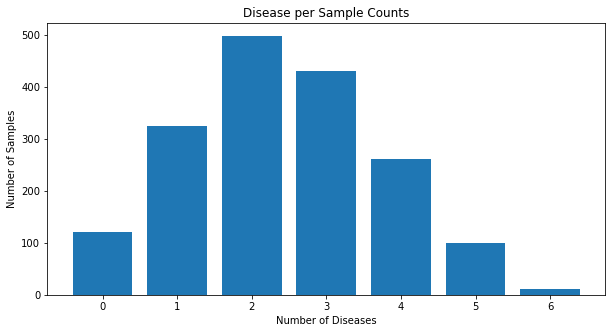

In [16]:
## DISEASE PER SAMPLE COUNTS

multiple_disease_counts = eda_df['total_diseases'].value_counts()

fig, ax = plt.subplots(figsize=(10,5))

ax.set_title('Disease per Sample Counts')
ax.set_ylabel('Number of Samples')
ax.set_xlabel('Number of Diseases')
ax.bar(multiple_disease_counts.index, multiple_disease_counts.values)


<BarContainer object of 6 artists>

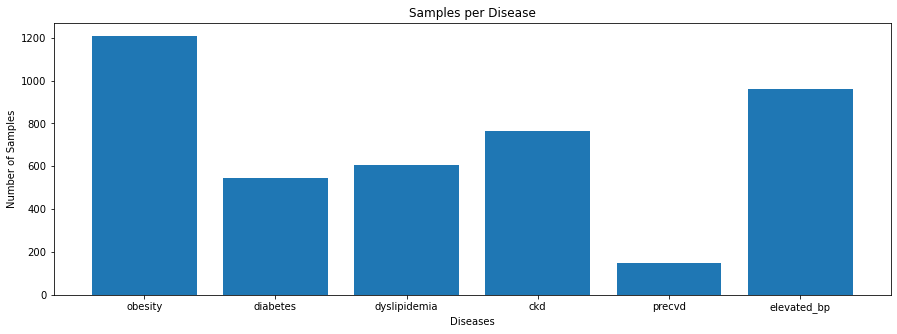

In [17]:
## SIZE OF EACH CLASS (DISEASE)

disease_counts = eda_df.drop(columns='total_diseases').sum(axis=0)

fig, ax = plt.subplots(figsize=(15, 5))

ax.set_title('Samples per Disease')
ax.set_ylabel('Number of Samples')
ax.set_xlabel('Diseases')
ax.bar(disease_counts.index, disease_counts.values)

## Data Preparation for Machine Learning

In [18]:
## In case we use pytorch

# setting device on GPU if available, else CPU
device = t.device('cuda' if t.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(t.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(t.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(t.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

GeForce RTX 2080 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [129]:
microbiome_ft = features
diseases = diseases

In [130]:
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import StratifiedKFold


In [232]:
def init_skf():
    """Function for initializing the StratifiedKFold cross-validator

    Args:
        n_splits (int): Number of splits to seperate data
        shuffle (boolean): Wheter to shuffle data
        skf_random_state (int): random_state

    Returns:
        StratifiedKFold: Initialized StratifiedKFold cross-validator
    """
    n_splits=10
    random_state=0
    shuffle=True
    
    skf = StratifiedKFold(n_splits=n_splits,shuffle=shuffle, random_state=random_state)
    
    return skf

def make_dataset():
    x = t.tensor(microbiome_ft.values)
    y = t.tensor(diseases.values)
    
    for train_index, test_index in skf.split(x, diseases[['precvd']]):
        x_train = x[train_index]
        y_train = y[train_index]
        # use 100 samples for testing
        x_test = x[test_index]
        y_test = y[test_index]
        
        return x_train, y_train, x_test, y_test

In [233]:
# `BinaryDataset()` class for multi-head binary classification model
class BinaryDataset(Dataset):
    def __init__(self, x, y):
        
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        features = self.x[index, :]
        labels = self.y[index, :]
        
        # there are 6 classes and each class can have a binary value ...
        # ... either 0 or 1
        obesity = torch.tensor(labels[0], dtype=torch.float32)
        diabetes = torch.tensor(labels[1], dtype=torch.float32)
        dyslipidemia = torch.tensor(labels[2], dtype=torch.float32)
        ckd = torch.tensor(labels[3], dtype=torch.float32)
        precvd = torch.tensor(labels[4], dtype=torch.float32)
        elevated_bp = torch.tensor(labels[5], dtype=torch.float32)
        
        return {
            'features': features,
            'obesity': obesity,
            'diabetes': diabetes,
            'dyslipidemia': dyslipidemia,
            'ckd': ckd,
            'precvd': precvd,
            'elevated_bp': elevated_bp
        }

In [234]:
class MultiHeadBinaryModel(nn.Module):
    def __init__(self):
        super(MultiHeadBinaryModel, self).__init__()
        self.fc1 = nn.Linear(42, 64) # 42 is the number of features
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        
        # we will treat each head as a binary classifier ...
        # ... so the output features will be 1
        self.out1 = nn.Linear(256, 1)
        self.out2 = nn.Linear(256, 1)
        self.out3 = nn.Linear(256, 1)
        self.out4 = nn.Linear(256, 1)
        self.out5 = nn.Linear(256, 1)
        self.out6 = nn.Linear(256, 1)
    
    def forward(self, x):
        x = x.to(torch.float32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        # each binary classifier head will have its own output
        out1 = F.sigmoid(self.out1(x))
        out2 = F.sigmoid(self.out2(x))
        out3 = F.sigmoid(self.out3(x))
        out4 = F.sigmoid(self.out4(x))
        out5 = F.sigmoid(self.out5(x))
        out6 = F.sigmoid(self.out6(x))
        
        return out1, out2, out3, out4, out5, out6

In [258]:
def binary_loss_fn(outputs, targets):
    o1, o2, o3, o4, o5, o6 = outputs
    t1, t2, t3, t4, t5, t6 = targets
    
    l1 = nn.BCELoss()(t.squeeze(o1), t1)
    l2 = nn.BCELoss()(t.squeeze(o2), t2)
    l3 = nn.BCELoss()(t.squeeze(o3), t3)
    l4 = nn.BCELoss()(t.squeeze(o4), t4)
    l5 = nn.BCELoss()(t.squeeze(o5), t5)
    l6 = nn.BCELoss()(t.squeeze(o6), t6)
    return (l1 + l2 + l3 + l4 + l5 + l6) / 6

In [259]:
a = t.tensor([[1], [2]])
a.size()
t.squeeze(a).size()

torch.Size([2])

In [260]:
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.optim as optim
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [261]:
x_train, y_train, x_test, y_test = make_dataset()
# print some info
print(f"[INFO]: Number of training samples: {x_train.shape[0]}")
print(f"[INFO]: Number of training features: {x_train.shape[1]}")
# train dataset
train_dataset = BinaryDataset(x_train, y_train)
# train data loader
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=32)
# initialize the model
model = MultiHeadBinaryModel()

[INFO]: Number of training samples: 1572
[INFO]: Number of training features: 42


In [262]:
# training function
def train(model, dataloader, optimizer, loss_fn, train_dataset, device):
    model.train()
    counter = 0
    train_running_loss = 0.0
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_dataset)/dataloader.batch_size)):
        counter += 1
        
        # extract the features and labels
        features = data['features'].to(device)
        target1 = data['obesity'].to(device)
        target2 = data['diabetes'].to(device)
        target3 = data['dyslipidemia'].to(device)
        target4 = data['ckd'].to(device)
        target5 = data['precvd'].to(device)
        target6 = data['elevated_bp'].to(device)

        # zero-out the optimizer gradients
        optimizer.zero_grad()
        
        outputs = model(features)
        targets = (target1, target2, target3, target4, target5, target6)
        loss = binary_loss_fn(outputs, targets)
        train_running_loss += loss.item()
        
        # backpropagation
        loss.backward()
        # update optimizer parameters
        optimizer.step()
        
    train_loss = train_running_loss / counter
    return train_loss

In [271]:
# learning parameters
optimizer = optim.Adam(params=model.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
epochs = 100
# load the model on to the computation device
model.to(device)

MultiHeadBinaryModel(
  (fc1): Linear(in_features=42, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=256, bias=True)
  (out1): Linear(in_features=256, out_features=1, bias=True)
  (out2): Linear(in_features=256, out_features=1, bias=True)
  (out3): Linear(in_features=256, out_features=1, bias=True)
  (out4): Linear(in_features=256, out_features=1, bias=True)
  (out5): Linear(in_features=256, out_features=1, bias=True)
  (out6): Linear(in_features=256, out_features=1, bias=True)
)

In [272]:
# start the training
train_loss = []
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(
        model, train_dataloader, optimizer, binary_loss_fn, train_dataset, device
    )
    train_loss.append(train_epoch_loss)
    print(f"Train Loss: {train_epoch_loss:.4f}")
# torch.save(model.state_dict(), 'multi_head_binary.py')

Epoch 1 of 100


  0%|          | 0/49 [00:00<?, ?it/s]/tmp/ipykernel_664/2247139169.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  obesity = torch.tensor(labels[0], dtype=torch.float32)
/tmp/ipykernel_664/2247139169.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  diabetes = torch.tensor(labels[1], dtype=torch.float32)
/tmp/ipykernel_664/2247139169.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dyslipidemia = torch.tensor(labels[2], dtype=torch.float32)
/tmp/ipykernel_664/2247139169.py:20: UserWarning: To copy construct from a tensor, it 

Train Loss: 34.2819
Epoch 2 of 100


50it [00:00, 108.24it/s]                        


Train Loss: 34.5007
Epoch 3 of 100


50it [00:00, 110.86it/s]                        


Train Loss: 34.2819
Epoch 4 of 100


50it [00:00, 114.37it/s]                        


Train Loss: 34.2090
Epoch 5 of 100


50it [00:00, 97.84it/s]                         


Train Loss: 34.2819
Epoch 6 of 100


50it [00:00, 105.90it/s]                        


Train Loss: 34.2819
Epoch 7 of 100


50it [00:00, 102.24it/s]                        


Train Loss: 34.3548
Epoch 8 of 100


50it [00:00, 105.56it/s]                        


Train Loss: 34.1361
Epoch 9 of 100


50it [00:00, 101.69it/s]                        


Train Loss: 34.2819
Epoch 10 of 100


50it [00:00, 99.21it/s]                        


Train Loss: 34.5006
Epoch 11 of 100


50it [00:00, 94.84it/s]                        


Train Loss: 34.4277
Epoch 12 of 100


50it [00:00, 95.07it/s]                         


Train Loss: 34.2090
Epoch 13 of 100


50it [00:00, 109.08it/s]                        


Train Loss: 34.1360
Epoch 14 of 100


50it [00:00, 110.28it/s]                        


Train Loss: 34.3548
Epoch 15 of 100


50it [00:00, 115.39it/s]                        


Train Loss: 34.2819
Epoch 16 of 100


50it [00:00, 106.90it/s]                        


Train Loss: 34.2819
Epoch 17 of 100


50it [00:00, 114.80it/s]                        


Train Loss: 34.4277
Epoch 18 of 100


50it [00:00, 104.92it/s]                        


Train Loss: 34.1360
Epoch 19 of 100


50it [00:00, 104.67it/s]                        


Train Loss: 34.2090
Epoch 20 of 100


50it [00:00, 108.76it/s]                        


Train Loss: 34.2090
Epoch 21 of 100


50it [00:00, 91.19it/s]                         


Train Loss: 34.3548
Epoch 22 of 100


50it [00:00, 110.40it/s]                        


Train Loss: 34.5006
Epoch 23 of 100


50it [00:00, 105.82it/s]                        


Train Loss: 34.5006
Epoch 24 of 100


50it [00:00, 93.55it/s]                         


Train Loss: 34.4277
Epoch 25 of 100


50it [00:00, 96.39it/s]                        


Train Loss: 34.2090
Epoch 26 of 100


50it [00:00, 98.86it/s]                         


Train Loss: 34.2819
Epoch 27 of 100


50it [00:00, 106.22it/s]                        


Train Loss: 34.2089
Epoch 28 of 100


50it [00:00, 104.40it/s]                        


Train Loss: 33.9902
Epoch 29 of 100


50it [00:00, 106.56it/s]                        


Train Loss: 34.3548
Epoch 30 of 100


50it [00:00, 111.94it/s]                        


Train Loss: 34.3548
Epoch 31 of 100


50it [00:00, 100.91it/s]                        


Train Loss: 34.4277
Epoch 32 of 100


50it [00:00, 108.93it/s]                        


Train Loss: 34.2089
Epoch 33 of 100


50it [00:00, 103.54it/s]                        


Train Loss: 34.4277
Epoch 34 of 100


50it [00:00, 97.56it/s]                         


Train Loss: 34.2089
Epoch 35 of 100


50it [00:00, 101.33it/s]                        


Train Loss: 34.3548
Epoch 36 of 100


50it [00:00, 109.07it/s]                        


Train Loss: 34.2089
Epoch 37 of 100


50it [00:00, 109.53it/s]                        


Train Loss: 34.2818
Epoch 38 of 100


50it [00:00, 104.53it/s]                        


Train Loss: 34.3548
Epoch 39 of 100


50it [00:00, 102.98it/s]                        


Train Loss: 34.3548
Epoch 40 of 100


50it [00:00, 99.98it/s]                         


Train Loss: 34.1360
Epoch 41 of 100


50it [00:00, 109.90it/s]                        


Train Loss: 34.5839
Epoch 42 of 100


50it [00:00, 108.10it/s]                        


Train Loss: 34.4381
Epoch 43 of 100


50it [00:00, 105.84it/s]                        


Train Loss: 34.2194
Epoch 44 of 100


50it [00:00, 106.11it/s]                        


Train Loss: 34.2923
Epoch 45 of 100


50it [00:00, 107.84it/s]                        


Train Loss: 34.3652
Epoch 46 of 100


50it [00:00, 112.55it/s]                        


Train Loss: 33.9277
Epoch 47 of 100


50it [00:00, 113.15it/s]                        


Train Loss: 34.1464
Epoch 48 of 100


50it [00:00, 90.05it/s]                         


Train Loss: 34.2923
Epoch 49 of 100


50it [00:00, 106.88it/s]                        


Train Loss: 34.2923
Epoch 50 of 100


50it [00:00, 112.76it/s]                        


Train Loss: 34.2923
Epoch 51 of 100


50it [00:00, 102.28it/s]                        


Train Loss: 34.4381
Epoch 52 of 100


50it [00:00, 105.45it/s]                        


Train Loss: 34.2194
Epoch 53 of 100


50it [00:00, 112.31it/s]                        


Train Loss: 34.1464
Epoch 54 of 100


50it [00:00, 105.36it/s]                        


Train Loss: 34.2923
Epoch 55 of 100


50it [00:00, 107.03it/s]                        


Train Loss: 34.4381
Epoch 56 of 100


50it [00:00, 107.71it/s]                        


Train Loss: 34.5110
Epoch 57 of 100


50it [00:00, 105.37it/s]                        


Train Loss: 34.4381
Epoch 58 of 100


50it [00:00, 105.38it/s]                        


Train Loss: 34.2194
Epoch 59 of 100


50it [00:00, 109.94it/s]                        


Train Loss: 34.4381
Epoch 60 of 100


50it [00:00, 94.54it/s]                         


Train Loss: 34.2923
Epoch 61 of 100


50it [00:00, 101.77it/s]                        


Train Loss: 34.0006
Epoch 62 of 100


50it [00:00, 111.08it/s]                        


Train Loss: 34.5839
Epoch 63 of 100


50it [00:00, 106.97it/s]                        


Train Loss: 33.8548
Epoch 64 of 100


50it [00:00, 99.36it/s]                         


Train Loss: 34.2193
Epoch 65 of 100


50it [00:00, 106.88it/s]                        


Train Loss: 34.4381
Epoch 66 of 100


50it [00:00, 100.20it/s]                        


Train Loss: 34.2923
Epoch 67 of 100


50it [00:00, 111.79it/s]                        


Train Loss: 34.2923
Epoch 68 of 100


50it [00:00, 112.72it/s]                        


Train Loss: 34.3652
Epoch 69 of 100


50it [00:00, 113.24it/s]                        


Train Loss: 34.2194
Epoch 70 of 100


50it [00:00, 92.41it/s]                        


Train Loss: 34.5839
Epoch 71 of 100


50it [00:00, 109.02it/s]                        


Train Loss: 34.1464
Epoch 72 of 100


50it [00:00, 113.12it/s]                        


Train Loss: 34.4381
Epoch 73 of 100


50it [00:00, 104.07it/s]                        


Train Loss: 34.5110
Epoch 74 of 100


50it [00:00, 96.67it/s]                         


Train Loss: 34.4381
Epoch 75 of 100


50it [00:00, 109.15it/s]                        


Train Loss: 34.0735
Epoch 76 of 100


50it [00:00, 101.56it/s]                        


Train Loss: 34.4381
Epoch 77 of 100


50it [00:00, 104.22it/s]                        


Train Loss: 34.1464
Epoch 78 of 100


50it [00:00, 102.86it/s]                        


Train Loss: 34.3652
Epoch 79 of 100


50it [00:00, 99.01it/s]                        


Train Loss: 34.2923
Epoch 80 of 100


50it [00:00, 99.12it/s]                         


Train Loss: 34.1464
Epoch 81 of 100


50it [00:00, 98.49it/s]                         


Train Loss: 34.0735
Epoch 82 of 100


50it [00:00, 106.02it/s]                        


Train Loss: 34.2923
Epoch 83 of 100


50it [00:00, 109.78it/s]                        


Train Loss: 34.0735
Epoch 84 of 100


50it [00:00, 107.50it/s]                        


Train Loss: 34.1464
Epoch 85 of 100


50it [00:00, 100.97it/s]                        


Train Loss: 34.3652
Epoch 86 of 100


50it [00:00, 101.44it/s]                        


Train Loss: 34.5110
Epoch 87 of 100


50it [00:00, 104.65it/s]                        


Train Loss: 34.4381
Epoch 88 of 100


50it [00:00, 107.01it/s]                        


Train Loss: 34.1464
Epoch 89 of 100


50it [00:00, 103.98it/s]                        


Train Loss: 34.3652
Epoch 90 of 100


50it [00:00, 104.89it/s]                        


Train Loss: 34.1464
Epoch 91 of 100


50it [00:00, 104.71it/s]                        


Train Loss: 34.5839
Epoch 92 of 100


50it [00:00, 114.22it/s]                        


Train Loss: 34.0735
Epoch 93 of 100


50it [00:00, 107.97it/s]                        


Train Loss: 34.5839
Epoch 94 of 100


50it [00:00, 110.16it/s]                        


Train Loss: 34.0006
Epoch 95 of 100


50it [00:00, 116.03it/s]                        


Train Loss: 34.0735
Epoch 96 of 100


50it [00:00, 107.47it/s]                        


Train Loss: 34.0006
Epoch 97 of 100


50it [00:00, 109.01it/s]                        


Train Loss: 34.2923
Epoch 98 of 100


50it [00:00, 106.94it/s]                        


Train Loss: 34.3652
Epoch 99 of 100


50it [00:00, 97.26it/s]                        


Train Loss: 34.0006
Epoch 100 of 100


50it [00:00, 111.41it/s]                        

Train Loss: 34.4381


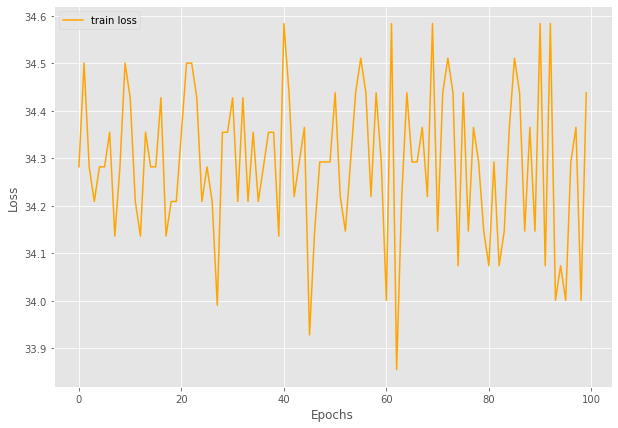

In [273]:
# plot and save the train loss graph
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('outputs/multi_head_binary_loss.png')
plt.show()

## Machine Learning Models

### Binary Relevance

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
def init_gbc_model():
    loss='exponential'
    learning_rate=0.1 
    n_estimators=150 
    max_depth=3
    random_state=0
    
    clf = GradientBoostingClassifier(loss=loss, 
                                     learning_rate=learning_rate, 
                                     n_estimators=n_estimators, 
                                     max_depth=max_depth, 
                                     random_state=random_state)
    
    return clf



def init_skf():
    """Function for initializing the StratifiedKFold cross-validator

    Args:
        n_splits (int): Number of splits to seperate data
        shuffle (boolean): Wheter to shuffle data
        skf_random_state (int): random_state

    Returns:
        StratifiedKFold: Initialized StratifiedKFold cross-validator
    """
    n_splits=10
    random_state=0
    shuffle=True
    
    skf = StratifiedKFold(n_splits=n_splits,shuffle=shuffle, random_state=random_state)
    
    return skf

#Maybe build tuning pipeline later on

In [71]:
def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.25, axes=None):
    mean = np.mean(values)
    stdev = np.std(values)
    confidence_interval = z * stdev / (len(values)**(1/2))

    left = x - horizontal_line_width / 2
    top = mean - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = mean + confidence_interval
    
    axes.plot([x, x], [top, bottom], color=color)
    axes.plot([left, right], [top, top], color=color)
    axes.plot([left, right], [bottom, bottom], color=color)
    axes.plot(x, mean, '.', color=color)

    return mean, confidence_interval


def plot_baseline(proportion, x, color='#2187bb', horizontal_line_width=0.25, axes=None):
    left = x - 0.3 - horizontal_line_width / 2
    right = x + 0.3 + horizontal_line_width / 2
    
    axes.plot([left, right], [proportion, proportion], color=color)

    return

Text(0.5, 1.0, 'Accuracy')

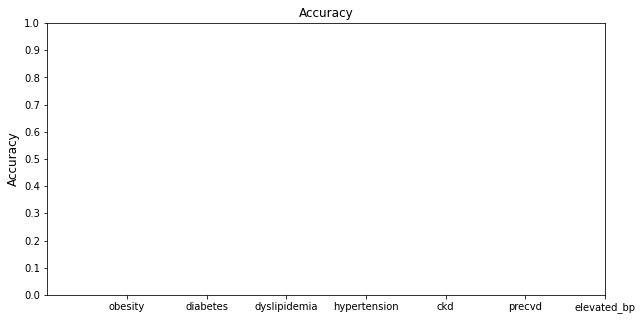

In [72]:
## INITIALIZE PLOT ##
fig, ax = plt.subplots(nrows=1,
                       ncols=1,
                       figsize=(8, 5)
#                        sharex=True, 
#                        sharey=True
                      )

y_ticks = plt.yticks(np.arange(11)/10)
x_ticks = plt.xticks(np.arange(1, len(diseases.columns)+1), [disease for disease in diseases.columns])

plt.ylabel('Accuracy', fontsize='large')
plt.autoscale(enable = False, tight=False, axis = 'y')
ax.set_title('Accuracy')
# ax[0].set_title('AUROC')
# ax[1].set_title('AUPR')

In [73]:
classifiers = {}
metrics = {}

X = features
for i, disease in enumerate(diseases, start=1):
    skf = init_skf()
    clf = init_gbc_model()
    
    y = diseases[disease]
    
    best_acc = float('-inf')
    acc_plot_data = []
    
    print('Training {} Classifier...'.format(disease))
    j=1
    for train_index, val_index in skf.split(X, y):
        
        train_X, train_y = X.iloc[train_index], y.iloc[train_index]
        val_X, val_y = X.iloc[val_index], y.iloc[val_index]

        clf.fit(train_X, train_y)
        
        preds = clf.predict(val_X)
#         preds = clf.predict_proba(val_X)[:,1] #predict probability of positive class predict
        
        acc = np.mean(preds==val_y)
        acc_plot_data.append(acc)
        if acc >= best_acc:
            best_model = clf
            best_acc = acc
        
        print('finished training split {}'.format(j))
        j+=1
    
    classifiers[disease] = best_model
    metrics[disease] = acc_plot_data
    
    plot_confidence_interval(i, acc_plot_data, axes=ax) #accuracy plot


Training obesity Classifier...
Finished training split 1
Finished training split 2
Finished training split 3
Finished training split 4
Finished training split 5
Finished training split 6
Finished training split 7
Finished training split 8
Finished training split 9
Finished training split 10
Training diabetes Classifier...
Finished training split 1
Finished training split 2
Finished training split 3
Finished training split 4
Finished training split 5
Finished training split 6
Finished training split 7
Finished training split 8
Finished training split 9
Finished training split 10
Training dyslipidemia Classifier...
Finished training split 1
Finished training split 2
Finished training split 3
Finished training split 4
Finished training split 5
Finished training split 6
Finished training split 7
Finished training split 8
Finished training split 9
Finished training split 10
Training hypertension Classifier...
Finished training split 1
Finished training split 2
Finished training split 3
Fini

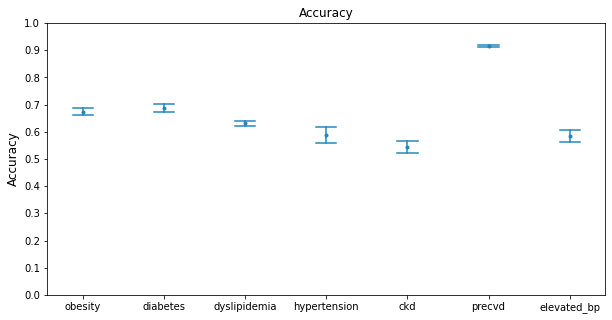

In [74]:
fig

### Classifier Chain

### Label Powerset

### Adapted Algorithms